In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import csv
from scipy.stats import linregress

In [2]:
# data for population from all hurricanes

pop_sandy = "./CleanEconData/Sandy_cln_population.csv"
pop_sandy_df = pd.read_csv(pop_sandy)
pop_sandy_df = pop_sandy_df[['Location','Hurricane','Population','Delta']]

pop_rita = "./CleanEconData/rita_cln_population.csv"
pop_rita_df = pd.read_csv(pop_rita)
pop_rita_df = pop_rita_df[['Location','Hurricane','Population','Delta']]


pop_katrina = "./CleanEconData/katrina_cln_population.csv"
pop_katrina_df = pd.read_csv(pop_katrina)
# pop_katrina_df = pop_katrina_df[['Location','Hurricane','Population','Delta']]

pop_ike = "./CleanEconData/Ike_cln_population.csv"
pop_ike_df = pd.read_csv(pop_ike)
pop_ike_df = pop_ike_df[['Location','Hurricane','Population','Delta']]

pop_ivan = "./CleanEconData/Ivan_cln_population.csv"
pop_ivan_df = pd.read_csv(pop_ivan)
pop_ivan_df = pop_ivan_df[['Location','Hurricane','Population','Delta']]

print(pop_katrina_df)

    Unnamed: 0        DATE  Population Hurricane Hurricane Date  \
0            1  2001-01-01    1311.131   Katrina     2005-08-29   
1            2  2002-01-01    1311.390   Katrina     2005-08-29   
2            3  2003-01-01    1312.039   Katrina     2005-08-29   
3            4  2004-01-01    1314.721   Katrina     2005-08-29   
4            5  2005-01-01    1313.460   Katrina     2005-08-29   
5            6  2006-01-01     987.535   Katrina     2005-08-29   
6            7  2007-01-01    1109.415   Katrina     2005-08-29   
7            8  2008-01-01    1168.547   Katrina     2005-08-29   
8            9  2009-01-01    1189.981   Katrina     2005-08-29   
9           10  2010-01-01    1195.368   Katrina     2005-08-29   
10          11  2011-01-01    1214.209   Katrina     2005-08-29   
11          12  2012-01-01    1227.264   Katrina     2005-08-29   
12          13  2013-01-01    1240.094   Katrina     2005-08-29   
13          14  2014-01-01    1249.547   Katrina     2005-08-2

In [19]:
#merge on Delta with value between -4 and 10

pop_merge_df = pd.concat([pop_sandy_df,pop_katrina_df,pop_ike_df,pop_ivan_df,pop_rita_df ])

pop_merge_df = pop_merge_df[pop_merge_df['Delta'].between(-4,7)]


pop_merge_df.head()


,Location,Hurricane,Population,Delta,Unnamed: 0,DATE,Hurricane Date,Hurricane Year,Population Year
0,Cape May,Sandy,96.402,-4,NaN,NaN,NaN,NaN,NaN
1,Cape May,Sandy,96.026,-3,NaN,NaN,NaN,NaN,NaN
2,Cape May,Sandy,97.222,-2,NaN,NaN,NaN,NaN,NaN
3,Cape May,Sandy,96.522,-1,NaN,NaN,NaN,NaN,NaN
4,Cape May,Sandy,96.267,0,NaN,NaN,NaN,NaN,NaN


In [20]:
pop_merge_df = pop_merge_df.pivot_table( values = 'Population', index=['Delta'], columns = 'Hurricane').reset_index()


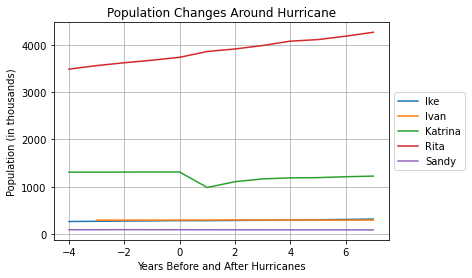

In [23]:
pop_merge_df.plot(x = 'Delta')
plt.title('Population Changes Around Hurricane')
plt.xlabel('Years Before and After Hurricanes')
plt.ylabel('Population (in thousands)')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid()
plt.savefig('./Graphs/PopulationGraph.png')